In [1]:
from FullyMobile import PROJECT_ROOT
import json
import seaborn as sns
import pandas as pd

### Budget Sensitivity

In [2]:
dict_frame = {}
with open(PROJECT_ROOT/"Experiments"/"output"/"cville_budget_sensitivity_cover.json") as f:
    data = json.load(f)
    dict_frame["cover_fac"] = {int(key): val["paths"] for key, val in data.items()} 
    dict_frame["cover_obj"] = {int(key): val["objective"] for key, val in data.items()} 
with open(PROJECT_ROOT/"Experiments"/"output"/"cville_budget_sensitivity_supplier.json") as f:
    data = json.load(f)
    dict_frame["supplier_fac"] = {int(key): val["paths"] for key, val in data.items()} 
    dict_frame["supplier_obj"] = {int(key): val["objective"] for key, val in data.items()} 

In [3]:
df = pd.DataFrame(dict_frame)
df.index.name = 'k' 
df

,cover_fac,cover_obj,supplier_fac,supplier_obj
k,,,,
3,"[[74647, 859963, 2600238, 2127148, 1678033, 26...",2.883926,"[[122888, 122888, 122888, 122888, 122888, 1228...",4.713846
4,"[[781204, 2468603, 754967, 2100792, 2521304, 1...",2.259715,"[[122888, 122888, 122888, 122888, 122888, 1228...",3.134121
5,"[[1176071, 2363976, 2626760, 2363976, 728600, ...",1.729681,"[[106561, 106561, 106561, 106561, 106561, 1065...",3.221558
6,"[[134126, 2100792, 1677999, 56513, 100340, 249...",1.443902,"[[106561, 106561, 106561, 106561, 106561, 1065...",3.221558
7,"[[1387407, 2416394, 2416397, 2574240, 132685, ...",1.311446,"[[2547776, 2547776, 2547776, 2547776, 2547776,...",2.153957
8,"[[2732510, 1519554, 2416397, 1387381, 132685, ...",1.256056,"[[2547776, 2547776, 2547776, 2547776, 2547776,...",2.197708
9,"[[438544, 307017, 2521329, 2521329, 97015, 257...",1.115427,"[[2547776, 2547776, 2547776, 2547776, 2547776,...",2.475715
10,"[[306962, 2047805, 2521329, 781274, 2626820, 2...",1.078484,"[[2547776, 2547776, 2547776, 2547776, 2547776,...",1.777087


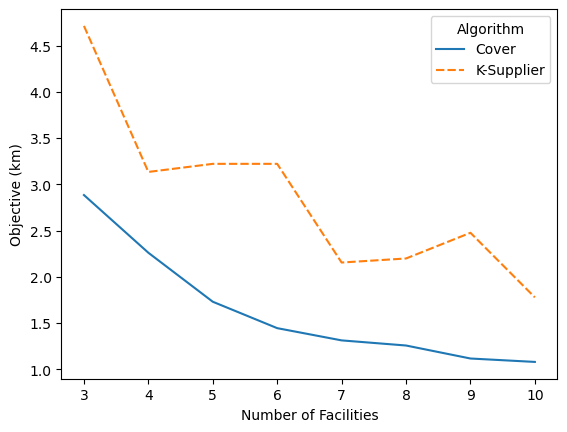

In [4]:
import matplotlib.pyplot as plt

plot = sns.lineplot(data = df[['cover_obj', 'supplier_obj']])
plot.set_ylabel("Objective (km)")
plot.set_xlabel("Number of Facilities")
plt.legend(title='Algorithm', labels=['Cover', 'K-Supplier'])

### Percentile Sensitivity

In [14]:
dict_frame = {}
with open(PROJECT_ROOT/"Experiments"/"output"/"percentile_sensitivity.json") as f:
    data = json.load(f)
    percentile = data["percentile_list"][1:]
    dict_frame["cover"] = {int(percentile[i]): val for i, val in enumerate(data["cover"]["obj_list"])} 
    dict_frame["supplier"] = {int(percentile[i]): val for i, val in enumerate(data["supplier"]["obj_list"])} 

In [15]:
df = pd.DataFrame(dict_frame)
df.index.name = 'percentile' 
df

,cover,supplier
percentile,,
1,0.072620,0.126596
2,0.117965,0.183771
3,0.156805,0.194139
4,0.176327,0.234102
5,0.214260,0.265289
...,...,...
96,1.048023,1.488258
97,1.057434,1.522227
98,1.067761,1.555635


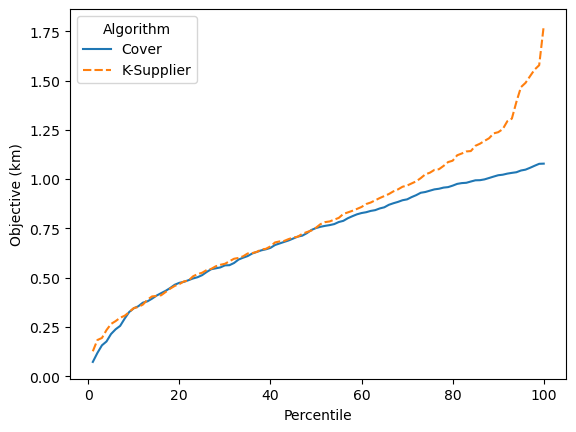

In [16]:
import matplotlib.pyplot as plt

plot = sns.lineplot(data = df)
plot.set_ylabel("Objective (km)")
plot.set_xlabel("Percentile")
plt.legend(title='Algorithm', labels=['Cover', 'K-Supplier'])

In [20]:
dict_frame = {}
with open(PROJECT_ROOT/"Experiments"/"output"/"percentile_sensitivity_3_10.json") as f:
    data = json.load(f)
    percentile = data["percentile_list"][1:]
    dict_frame["cover"] = {int(percentile[i]): val for i, val in enumerate(data["cover"]["obj_list"])} 
    dict_frame["supplier"] = {int(percentile[i]): val for i, val in enumerate(data["supplier"]["obj_list"])} 

In [21]:
df_3 = pd.DataFrame(dict_frame)
df_3.index.name = 'percentile' 
df_3

,cover,supplier
percentile,,
1,0.075912,0.126596
2,0.105219,0.183771
3,0.142646,0.194139
4,0.157973,0.234102
5,0.201796,0.265289
...,...,...
96,1.129202,1.488258
97,1.132377,1.522227
98,1.137696,1.555635


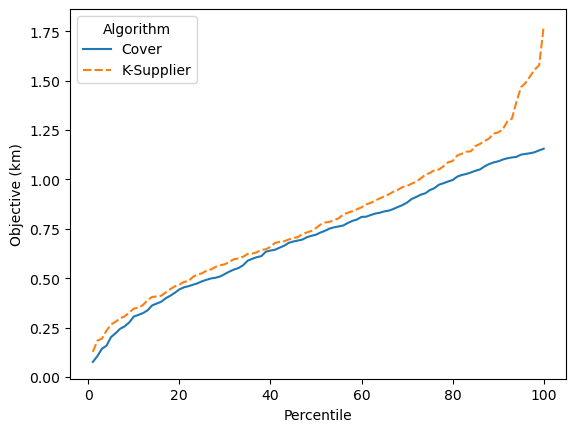

In [22]:
import matplotlib.pyplot as plt

plot = sns.lineplot(data = df_3)
plot.set_ylabel("Objective (km)")
plot.set_xlabel("Percentile")
plt.legend(title='Algorithm', labels=['Cover', 'K-Supplier'])

### Movement Sensitivity

In [11]:
dict_frame = {}
with open(PROJECT_ROOT/"Experiments"/"output"/"cville_movement_sensitivity.json") as f:
    data = json.load(f)
    dict_frame["cover_fac"] = {int(key): val["paths"] for key, val in data.items()}
    dict_frame["cover_obj"] = {int(key): val["objective"] for key, val in data.items()}

In [15]:
df_movement = pd.DataFrame(dict_frame)
df_movement.index.name = 'm'
df_movement

,cover_fac,cover_obj
m,,
3,"[[306962, 2047805, 2521329, 781274, 2626820, 2...",1.078080
4,"[[306962, 2047805, 2521329, 781274, 2626820, 2...",1.078484
5,"[[306962, 2047805, 2521329, 781274, 2626820, 2...",1.078484
6,"[[306962, 2047805, 2521329, 781274, 2626820, 2...",1.078484
7,"[[306962, 2047805, 2521329, 781274, 2626820, 2...",1.078484


Text(0.5, 0, 'Movement, m (km)')

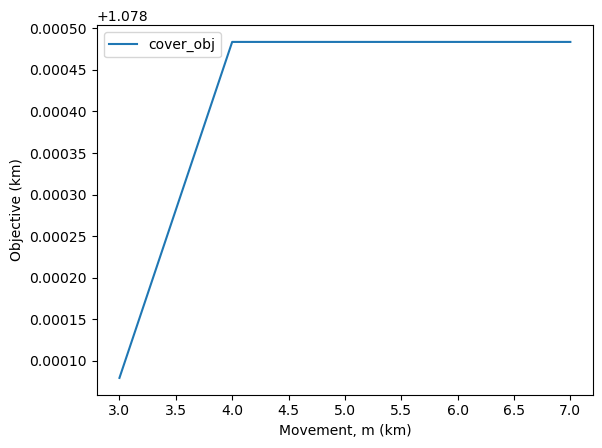

In [17]:
plot = sns.lineplot(data = df_movement[["cover_obj"]])
plot.set_ylabel("Objective (km)")
plot.set_xlabel("Movement, m (km)")